In [70]:
from __future__ import print_function

import numpy as np
import seaborn as sbn
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
import scipy.optimize
import scipy.io

from itertools import izip

plt.style.use('classic')
mpl.rcParams['axes.xmargin'] = 0.0
mpl.rcParams['axes.ymargin'] = 0.0

%matplotlib inline

In [19]:
data = scipy.io.loadmat ('ex4data1.mat')
X = data['X']
y = data['y'] - 1

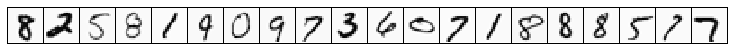

In [130]:
sel = np.random.choice (len (X), size=20)
plt.figure (figsize=(10,200))
gs = gridspec.GridSpec (1, 20, 
                        wspace=0., hspace=0., 
                        left=0., right=1., 
                        bottom=0., top=1.)
xs = np.arange (20)[::-1]
ys = np.arange (20)[::-1]
xs_grid, ys_grid = np.meshgrid (xs, ys, indexing='ij')
for i, s in enumerate (sel):
    ax = plt.subplot (gs[i])
    ax.pcolormesh (xs_grid, ys_grid, X[s].reshape (20, 20)[::-1], cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect ('equal')
    ax.set_xlim (-0.5, 19.5)
    ax.set_ylim (-0.5, 19.5)

In [4]:
weights = scipy.io.loadmat ('ex4weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

nn_params = np.append (Theta1.flatten (), Theta2.flatten ())

In [5]:
def sigmoid (z):
    return (1. / (1. + np.exp (-z)))

def sigmoidGradient (z):
    g = sigmoid (z)
    return (g * (1. - g))

In [6]:
def nnCostFunction (nn_params, input_layer_size, 
                    hidden_layer_size, num_labels, 
                    X, y, lambda_reg):
    Theta1 = nn_params[:(hidden_layer_size * (input_layer_size + 1))].reshape (
        hidden_layer_size, input_layer_size + 1)
    Theta2 = nn_params[(hidden_layer_size * (input_layer_size + 1)):]
    Theta2 = Theta2.reshape (
        num_labels, hidden_layer_size + 1)
    
    m = X.shape[0]
    
    y_vec = np.zeros ((m, num_labels))
    for i in range (m):
        y_vec[i, y[i]] = 1
    
    a1 = np.hstack ((np.ones ((m, 1)), X))
    
    z2 = a1.dot (Theta1.T)
    a2 = sigmoid (z2)
    
    a2 = np.hstack ((np.ones ((m, 1)), a2))
    z3 = a2.dot (Theta2.T)
    a3 = sigmoid (z3)
    
    J = 0
    for i in range (m):
        J -= 1./m * (y_vec[[i]].dot (np.log (a3[[i]].T)) + 
                     (1. - y_vec[[i]]).dot (np.log ((1. - a3[[i]]).T)))[0][0]
    
    J += lambda_reg/(2.*m) * np.sum (Theta1[:, 1:]**2)
    J += lambda_reg/(2.*m) * np.sum (Theta2[:, 1:]**2)
    
    return (J)

def nnGradient (nn_params, input_layer_size, 
                hidden_layer_size, num_labels, 
                X, y, lambda_reg):
    
    Theta1 = nn_params[:(hidden_layer_size * (input_layer_size + 1))].reshape (
        hidden_layer_size, input_layer_size + 1)
    Theta2 = nn_params[(hidden_layer_size * (input_layer_size + 1)):].reshape (
        num_labels, hidden_layer_size + 1)
    
    m = X.shape[0]
    
    y_vec = np.zeros ((m, num_labels))
    for i in range (m):
        y_vec[i, y[i]] = 1
    
    a1 = np.hstack ((np.ones ((m, 1)), X))
    
    z2 = a1.dot (Theta1.T)
    a2 = sigmoid (z2)
    
    a2 = np.hstack ((np.ones ((m, 1)), a2))
    z3 = a2.dot (Theta2.T)
    a3 = sigmoid (z3)
    
    delta3 = a3 - y_vec
    delta2 = delta3.dot (Theta2)
    delta2 = delta2[:, 1:] * sigmoidGradient (z2)
    Theta1_grad = 1./m * delta2.T.dot (a1)
    Theta2_grad = 1./m * delta3.T.dot (a2)
    Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + lambda_reg/m * Theta1[:, 1:]
    Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + lambda_reg/m * Theta2[:, 1:]
    
    return (np.append (Theta1_grad.flatten (), Theta2_grad.flatten ()))

def numericalGradient (func, theta):
    num_grad = np.zeros (theta.shape)
    perturb = np.zeros (theta.shape)
    eps = 1e-4
    
    for p in range (theta.size):
        perturb[p] = eps
        loss1 = func (theta - perturb)
        loss2 = func (theta + perturb)
        num_grad[p] = (loss2 - loss1) / (2.*eps)
        perturb[p] = 0.
        
    return (num_grad)

In [7]:
lambda_reg = 0.
J = nnCostFunction (nn_params, input_layer_size, hidden_layer_size,
                    num_labels, X, y, lambda_reg)

print ('Cost at parameters (loaded from ex4weights): {0:.6f}'.format (J))
print ('(this value should be about 0.287629)')

Cost at parameters (loaded from ex4weights): 0.287629
(this value should be about 0.287629)


In [8]:
lambda_reg = 1.
J = nnCostFunction (nn_params, input_layer_size, hidden_layer_size,
                    num_labels, X, y, lambda_reg)

print ('Cost at parameters (loaded from ex4weights): {0:.6f}'.format (J))
print ('(this value should be about 0.383770)')

Cost at parameters (loaded from ex4weights): 0.383770
(this value should be about 0.383770)


In [9]:
g = sigmoidGradient(np.array ([-1, -0.5, 0, 0.5, 1]))

print ('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]')
print (g)

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]
[ 0.19661193  0.23500371  0.25        0.23500371  0.19661193]


In [10]:
epsilon_init = 0.12

def randInitializeWeights (L_in, L_out):
    return (np.random.uniform (low=-epsilon_init, 
                               high=epsilon_init, 
                               size=(L_out, L_in + 1)))

In [11]:
initial_Theta1 = randInitializeWeights (input_layer_size, 
                                        hidden_layer_size)
initial_Theta2 = randInitializeWeights (hidden_layer_size,
                                        num_labels)

initial_nn_params = np.append (initial_Theta1.flatten (), 
                               initial_Theta2.flatten ())

In [12]:
def debugInitializeWeights (fan_out, fan_in):
    temp = np.zeros ((fan_out, fan_in + 1))
    return ((np.sin (range (0, temp.size))).reshape (temp.shape))

In [13]:
def checkNNGradients (l=0.):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    
    Theta1 = debugInitializeWeights (hidden_layer_size, input_layer_size)
    Theta2 = debugInitializeWeights (num_labels, hidden_layer_size)
    
    X = debugInitializeWeights (m, input_layer_size-1)
    y = np.mod (range (m), num_labels).reshape (m, 1)
    
    nn_params = np.append (Theta1.flatten (), Theta2.flatten ())
    
    costFunc = lambda p, ils=input_layer_size, \
        hls=hidden_layer_size, nls=num_labels, X=X, y=y, l=lambda_reg: \
            nnCostFunction (p, ils, hls, nls, X, y, l)
    
    gradFunc = lambda p, ils=input_layer_size, \
        hls=hidden_layer_size, nls=num_labels, X=X, y=y, l=lambda_reg: \
            nnGradient (p, ils, hls, nls, X, y, l)
    
    cost = costFunc (nn_params)
    grad = gradFunc (nn_params)   
    
    num_grad = numericalGradient (costFunc, nn_params)
    
    print (np.hstack ((num_grad.reshape (-1, 1), grad.reshape (-1, 1))))
    print ('The above two columns you get should be very similar.')
    print ('(Left-Your Numerical Gradient, Right-Analytical Gradient)')
    print ()
    
    diff = np.linalg.norm (num_grad - grad) / \
        np.linalg.norm (num_grad + grad)
        
    print ('If your backpropagation implementation is correct, then ')
    print ('the relative difference will be small (less than 1e-9). ')
    print ('Relative Difference:', diff)

In [14]:
checkNNGradients ()

[[ 0.0674626   0.0674626 ]
 [ 0.15783461  0.15783461]
 [ 0.19714626  0.19714626]
 [ 0.05520255  0.05520255]
 [ 0.1005383   0.1005383 ]
 [-0.20106089 -0.20106089]
 [-0.02795059 -0.02795059]
 [ 0.17085735  0.17085735]
 [ 0.0362788   0.0362788 ]
 [ 0.08224174  0.08224174]
 [-0.09440395 -0.09440395]
 [-0.18425508 -0.18425508]
 [-0.0465067  -0.0465067 ]
 [ 0.09563276  0.09563276]
 [ 0.18011249  0.18011249]
 [ 0.09899762  0.09899762]
 [-0.11622808 -0.11622808]
 [-0.18744305 -0.18744305]
 [-0.16480599 -0.16480599]
 [ 0.00935294  0.00935294]
 [ 0.12738199  0.12738199]
 [ 0.21756767  0.21756767]
 [ 0.26415784  0.26415784]
 [ 0.0791804   0.0791804 ]
 [-0.08860164 -0.08860164]
 [-0.10935721 -0.10935721]
 [ 0.10132144  0.10132144]
 [ 0.22412062  0.22412062]
 [ 0.22521796  0.22521796]
 [ 0.12346978  0.12346978]
 [-0.02476629 -0.02476629]
 [-0.18986037 -0.18986037]
 [ 0.27514068  0.27514068]
 [ 0.20726117  0.20726117]
 [ 0.27292842  0.27292842]
 [ 0.34174548  0.34174548]
 [ 0.02395977  0.02395977]
 

In [15]:
checkNNGradients (3.)

[[ 0.0674626   0.0674626 ]
 [ 0.15783461  0.15783461]
 [ 0.19714626  0.19714626]
 [ 0.05520255  0.05520255]
 [ 0.1005383   0.1005383 ]
 [-0.20106089 -0.20106089]
 [-0.02795059 -0.02795059]
 [ 0.17085735  0.17085735]
 [ 0.0362788   0.0362788 ]
 [ 0.08224174  0.08224174]
 [-0.09440395 -0.09440395]
 [-0.18425508 -0.18425508]
 [-0.0465067  -0.0465067 ]
 [ 0.09563276  0.09563276]
 [ 0.18011249  0.18011249]
 [ 0.09899762  0.09899762]
 [-0.11622808 -0.11622808]
 [-0.18744305 -0.18744305]
 [-0.16480599 -0.16480599]
 [ 0.00935294  0.00935294]
 [ 0.12738199  0.12738199]
 [ 0.21756767  0.21756767]
 [ 0.26415784  0.26415784]
 [ 0.0791804   0.0791804 ]
 [-0.08860164 -0.08860164]
 [-0.10935721 -0.10935721]
 [ 0.10132144  0.10132144]
 [ 0.22412062  0.22412062]
 [ 0.22521796  0.22521796]
 [ 0.12346978  0.12346978]
 [-0.02476629 -0.02476629]
 [-0.18986037 -0.18986037]
 [ 0.27514068  0.27514068]
 [ 0.20726117  0.20726117]
 [ 0.27292842  0.27292842]
 [ 0.34174548  0.34174548]
 [ 0.02395977  0.02395977]
 

In [16]:
lambda_reg = 3.
debug_J = nnCostFunction (nn_params, input_layer_size,
                          hidden_layer_size, num_labels, 
                          X, y, lambda_reg)

print ('Cost at (fixed) debugging parameters (w/ lambda = 3): {0:.6f}'.format (debug_J))
print ('(this value should be about 0.576051)')

Cost at (fixed) debugging parameters (w/ lambda = 3): 0.576051
(this value should be about 0.576051)


In [145]:
lambda_reg = 1.
result = scipy.optimize.minimize (
    fun=nnCostFunction, x0 = initial_nn_params,
    args = (input_layer_size, hidden_layer_size, num_labels,
            X, y, lambda_reg),
    method='CG', jac=nnGradient, 
    options=dict(maxiter=50, disp=True))

         Current function value: 0.457574
         Iterations: 50
         Function evaluations: 102
         Gradient evaluations: 102


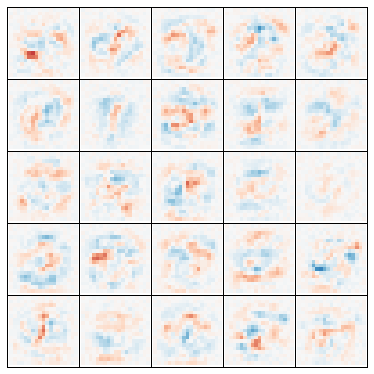

In [146]:
Theta1 = result.x[:((input_layer_size+1)*hidden_layer_size)].reshape ((
    hidden_layer_size, input_layer_size+1))
Theta2 = result.x[((input_layer_size+1)*hidden_layer_size):].reshape ((
    num_labels, hidden_layer_size+1))

Theta1_plot = Theta1[:, 1:]

fig = plt.figure (figsize=(5, 5))
gs = gridspec.GridSpec (5, 5, 
                        wspace=0., hspace=0., 
                        left=0., right=1., 
                        bottom=0., top=1.)

xs = np.arange (20)[::-1]
ys = np.arange (20)[::-1]
xs_grid, ys_grid = np.meshgrid (xs, ys, indexing='ij')
for i, row in enumerate (Theta1_plot):
    ax = plt.subplot (gs[i])
    ax.pcolormesh (xs_grid, ys_grid, row.reshape (20, 20)[::-1], 
                   cmap='RdBu_r', vmin=-2, vmax=2)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect ('equal')
    ax.set_xlim (-0.5, 19.5)
    ax.set_ylim (-0.5, 19.5)

In [147]:
def predict (Theta1, Theta2, X):
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    
    X = np.hstack ((np.ones ((m, 1)), X))
    
    h1 = sigmoid (X.dot (Theta1.T))
    h1 = np.hstack ((np.ones ((m, 1)), h1))
    h2 = sigmoid (h1.dot (Theta2.T))
    
    p = np.argmax (h2, axis=1).reshape ((m, 1))
    return (p)   

In [148]:
pred = predict (Theta1, Theta2, X)
print ('Training Set Accuracy: {0:.2f}%'.format (
        100. / len (y) * (pred == y).sum ()))

Training Set Accuracy: 95.70%
